# Switch loops with iterTools


By Sebastian Arias T.

## Iterables and iterators


### What is an Iterable?

Is an object which can iterate over - return it's members one at the time

Lists, Tuples, Dictionaries are iterables - Iterable containers

Iterables implement `__iter__()` method

Generates an *iterator* when passed to `iter()`

In [6]:
jedis_iterable = ["Obi-Wan Kenobi", "Anakin Skywalker", "Mace Windu"]  # List

print(f"is iterable? - {hasattr(jedis_iterable, '__iter__')}")
 

is iterable? - True


### What is an Iterator?

Objects which is use to iterate over an *iterable* using `next()`

This objects implement the method `__next__()` 

`__next__()` returns the next item of the object

When no more items, it raises `StopIteration` exception

In [7]:
print(next(jedis_iterable))

TypeError: 'list' object is not an iterator

In [ ]:
jedis_iterator = iter(jedis_iterable)
print(next(jedis_iterator))

## Types of Iterators




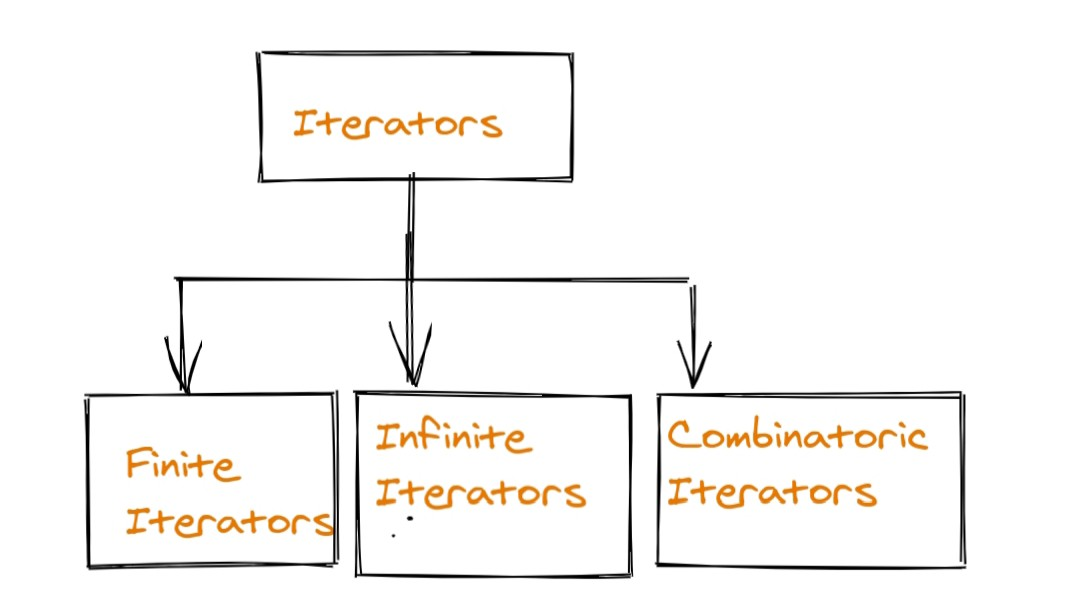






#### Finite Iterators
Runs in a finite amount of times

#### Infinite Iterators
Runs forever, if there is no stopping condition

#### Combinatoric Iterators
The recursive generators that are used to simplify combinatorial functions such as permutations, combinations, and Cartesian products.

## Are all Iterables iterators?


**Every iterator is also an iterable**, *but not every iterable is an iterator*

`List` is an **iterable**, but not an *iterator*

An *iterator* can be created by an iterable using `iter()`

## What are itertools?

Module that implements `iterator` building blocks - functions


It is inspired by constructs from languages like *Haskell*, *APL* and *SML*

This blocks were recasted to be suitable for Python


This module is part of Python

 It is used to iterate over data structures (iterables) that can be stepped over using a **for-loop**

## Most Used Itertools (in my experience) Overview



### itertools.chain(*iterables)

Returns the elements from the first iterable until it is exhausted, then continues with the next until there are no more iterables

In [ ]:
def my_chain(*iterables):
    for iterable in iterables:
        for elem in iterable:
            yield elem

            
it = my_chain('Obi', 'Wan')

print(next(it))
print(next(it))
print(next(it))

In [ ]:
from itertools import chain

it = chain('Obi', 'Wan')

print(next(it))
print(next(it))
print(next(it))
print(next(it))
print(next(it))
print(next(it))

### itertools.chain.from_iterable(iterable)
Like `chain` but with elements from an iterable

In [ ]:
from itertools import chain

from_it = chain.from_iterable(['Obi', 'Wan'])

print(next(from_it))
print(next(from_it))
print(next(from_it))

### itertools.compress(data, selector)

Filters elements from *data* that have a corresponding `True` element in *selector* finish when *data* or *selector* are exahusted

In [ ]:
from itertools import compress

clone_wars_generals = ["Obi-Wan", "Grievous", "Anakin","Doku", "Mace Windu"]
is_separatist = [False, True, False, True, False]

separatist_generals = compress(clone_wars_generals, is_separatist)


print(next(separatist_generals))
print(next(separatist_generals))

### itertools.filterfalse(predicate, iterable)

Create an iterator that drops elements as long as the predicate is `False`

In [ ]:
from itertools import filterfalse

foo = [1,2,3,4,5,6,7,8,9,10]
res = filterfalse(lambda x: x<5, foo)

print(next(res))
print(next(res))
print(next(res))
print(next(res))

### itertools.groupby(iterable, key)
Calculates the keys for each element present in iterable, and returns the key and iterable of grouped items.

*Note: Elements must be sorted to prevent repeated keys*

In [7]:
from itertools import groupby

iterable = 'AAAABBBCCDAABBB'

res = groupby(iterable)
print([f"{k}: {list(g)}" for k,g in res])

["A: ['A', 'A', 'A', 'A']", "B: ['B', 'B', 'B']", "C: ['C', 'C']", "D: ['D']", "A: ['A', 'A']", "B: ['B', 'B', 'B']"]


In [8]:
from itertools import groupby

star_wars_generals = [
    ("republic", "Obi-Wan"), 
    ("republic","Anakin"),
    ("separatists", "Count Doku"),
    ("separatists", "Grievous")
]

group_by_result = groupby(
    star_wars_generals, 
    lambda x: x[0]
)

print([f"{k}: {list(g)}" for k, g in group_by_result])

["republic: [('republic', 'Obi-Wan'), ('republic', 'Anakin')]", "separatists: [('separatists', 'Count Doku'), ('separatists', 'Grievous')]"]


### itertools.starmap(function, iterable)
Make an iterator that computes the function using arguments obtained from the iterable

In [31]:
from itertools import starmap

data = [(2, 3, 2), (5, 3, 2), (4, 3, 6)] 

def is_multiple(a, b, c):
    return (a * b) % c == 0

print([res for res in starmap(is_multiple, data)])



[True, False, True]


## Aplication of Itertools In Real Life Scenarios



## Flatten Lists

In [ ]:
import timeit

data_list = [["Option1", "Option2", "Option3"], ["SubOption1", "SubOption2", "SubOption3"]]

def flatten_list():
    flat_list = list()
    for element in data_list:
        for item in element:
            flat_list.append(item)
    return flat_list

print(flatten_list())


timeit.Timer(flatten_list).timeit(number=10000)

In [ ]:
import timeit

def flatten_list_comp():
    return [item for elem in data_list for item in elem]


print(flatten_list_comp())


timeit.Timer(flatten_list_comp).timeit(number=10000)

In [ ]:
from itertools import chain

def flatten_list_it():
    return list(chain(data_list))


print(flatten_list_it())

timeit.Timer(flatten_list_it).timeit(number=10000)

## Casting Data

In [ ]:
# Convert String to number
string_list = ['12', '34', '63', '190']

number_list = list()

def cast_string_to_number():
    for item in string_list:
        number_list.append(int(item))
    return number_list

print(cast_string_to_number())
print(sum(number_list))

timeit.Timer(cast_string_to_number).timeit(number=10000)

In [ ]:
def cast_string_to_number_comp() -> list:
    return [int(item) for item in string_list]

print(sum(cast_string_to_number_comp()))

timeit.Timer(cast_string_to_number_comp).timeit(number=10000)

In [ ]:
from itertools import chain

def cast_string_to_number_it() -> :
    return map(int, chain(string_list))

print(sum(cast_string_to_number_it()))

timeit.Timer(cast_string_to_number_it).timeit(number=10000)

## Data selection

In [82]:
car_models = ["Nissan GTR", "Tesla Model Y", "AMG EQE53", "Toyota Supra"]
electric_cars_selector = [0, 1, 1, 0]

def get_electric_car_models():
    electric_cars = list()
    for idx, car in enumerate(car_models):
        if electric_cars_selector[idx]:
            electric_cars.append(car)
            
    return electric_cars

print(get_electric_car_models())

timeit.Timer(get_electric_car_models).timeit(number=1000)        

['Tesla Model Y', 'AMG EQE53']


0.0011819169994851109

In [83]:
def get_electric_car_models_comp():
    return [car for idx, car in enumerate(car_models) if electric_cars_selector[idx]]

print(get_electric_car_models_comp())
timeit.Timer(get_electric_car_models_comp).timeit(number=1000)        

['Tesla Model Y', 'AMG EQE53']


0.001856416999544308

In [84]:
from itertools import compress

def get_electric_car_models_it():
    return compress(car_models, electric_cars_selector)


print(get_electric_car_models_comp())

timeit.Timer(get_electric_car_models_it).timeit(number=1000)

['Tesla Model Y', 'AMG EQE53']


0.00036404200000106357

In [78]:
import timeit

cars_list = [
    {
        'brand': 'Nissan',
        'model': 'GTR',
        'is_electric': False,
    },
    {
        'brand': 'Toyota',
        'model': 'Supra',
        'is_electric': False,
    },
    {
        'brand': 'Tesla',
        'model': 'Y',
        'is_electric': True,
    },
    {
        'brand': 'Mercedes',
        'model': 'AMG EQE53',
        'is_electric': True,
    }
]

def get_non_electric_cars():
    non_electric_cars = list()
    for car in cars_list:
        if not car['is_electric']:
            non_electric_cars.append(car)
            
    return non_electric_cars

print(get_non_electric_cars())

timeit.Timer(get_non_electric_cars).timeit(number=1000)

[{'brand': 'Nissan', 'model': 'GTR', 'is_electric': False}, {'brand': 'Toyota', 'model': 'Supra', 'is_electric': False}]


0.0014309999996839906

In [79]:
from itertools import filterfalse
from collections.abc import Iterator

def get_non_electric_cars_it() -> Iterator:
    return filterfalse(lambda car: car['is_electric'], cars_list)

print(list(get_non_electric_cars_it()))

timeit.Timer(get_non_electric_cars_it).timeit(number=1000)

[{'brand': 'Nissan', 'model': 'GTR', 'is_electric': False}, {'brand': 'Toyota', 'model': 'Supra', 'is_electric': False}]


0.0008852920000208542

## Data grouping

In [2]:
import timeit

pets_list = [
    {
        "name": "Rocky",
        "breed": "Akita"
    },
    {
        "name": "Charlie",
        "breed": "Akita"
    },
    {
        "name": "Loki",
        "breed": "Akita"
    },
    {
        "name": "Legend",
        "breed": "German Sheepard"
    },
    {
        "name": "Stella",
        "breed": "German Sheepard"
    },
    {
        "name": "Lola",
        "breed": "German Sheepard"
    },
    {
        "name": "Lucy",
        "breed": "Golden Retriever"
    },
    {
        "name": "Duke",
        "breed": "Golden Retriever"
    },
    {
        "name": "Tucker",
        "breed": "Golden Retriever"
    }
]

In [75]:
import timeit

def group_by_breed(pets_list: list, breed: str) -> list:
    result_pets = list()
    for pet in pets_list:
        if pet['breed'] == breed:
            result_pets.append(pet)
    return result_pets

t = timeit.Timer(lambda: group_by_breed(pets_list, "German Sheepard")) 
print(t.timeit(number=1000))

print(group_by_breed(pets_list, "German Sheepard"))

0.0033033339996109135
[{'name': 'Legend', 'breed': 'German Sheepard'}, {'name': 'Stella', 'breed': 'German Sheepard'}, {'name': 'Lola', 'breed': 'German Sheepard'}]


In [76]:
import timeit
from itertools import groupby
from collections.abc import Iterator

def group_by_type_it() -> Iterator:
    return groupby(pets_list, lambda pet: pet["breed"])

grouped_pets_by_breeds = {key: list(values) for key, values in group_by_type_it()}

print(grouped_pets_by_breeds)

print("---- German Sheepard ----")
print(grouped_pets_by_breeds['German Sheepard'])



timeit.Timer(group_by_type_it).timeit(number=1000)

{'Akita': [{'name': 'Rocky', 'breed': 'Akita'}, {'name': 'Charlie', 'breed': 'Akita'}, {'name': 'Loki', 'breed': 'Akita'}], 'German Sheepard': [{'name': 'Legend', 'breed': 'German Sheepard'}, {'name': 'Stella', 'breed': 'German Sheepard'}, {'name': 'Lola', 'breed': 'German Sheepard'}], 'Golden Retriever': [{'name': 'Lucy', 'breed': 'Golden Retriever'}, {'name': 'Duke', 'breed': 'Golden Retriever'}, {'name': 'Tucker', 'breed': 'Golden Retriever'}]}
---- German Sheepard ----
[{'name': 'Legend', 'breed': 'German Sheepard'}, {'name': 'Stella', 'breed': 'German Sheepard'}, {'name': 'Lola', 'breed': 'German Sheepard'}]


0.0006422079995900276

## Mapping multiple arguments into functions

In [85]:
from typing import NamedTuple

class Stocks(NamedTuple):
    stock: str
    buy_price: float
    shares: int
    current_price: float


stocks_i = [
    Stocks('APPL', 130.00, 2, 200.00),
    Stocks('TSLA', 400.00, 5, 550.00),
    Stocks('NDAQ', 150.00, 4, 100.00),
]

def calculate_gain_loss() -> list:
    results = list()
    for stock in stocks_i:
        buy_total = stock.shares * stock.buy_price
        current_total = stock.shares * stock.current_price
        gain_loss = current_total - buy_total
        
        results.append(f'{stock.stock} result: {gain_loss}')
    return results

print(calculate_gain_loss())
timeit.Timer(calculate_gain_loss).timeit(1000)


['APPL result: 140.0', 'TSLA result: 750.0', 'NDAQ result: -200.0']


0.004543250000097032

In [86]:
import timeit
from itertools import starmap

def calculate_gain_loss_it(stock: str, buy_price: float, shares: int, current_price: float) -> str:
    buy_total = shares * buy_price
    current_total = shares * current_price
    gain_loss = current_total - buy_total

    return f'{stock} result: {gain_loss}'

print(timeit.Timer(lambda: starmap(calculate_gain_loss_it, stocks_i)).timeit(number=1000))

print(list(starmap(calculate_gain_loss_it, stocks_i)))

0.00033191700003953883
['APPL result: 140.0', 'TSLA result: 750.0', 'NDAQ result: -200.0']


### Advantages of itertools



Fast, memory efficient funtions for iterators

Module functions can be used by themselves or in combination

Good looking code 😎

### Disadvantages of itertools

Get used on how to used it

Clear understanding of iterable and iterator 

### Conclusions

Accomplished the refactor of confusing, hard to maintain loops into one-liners

No more *how the program should do something*. Switched to *what the program should do something* without specifing the flow control

Thinking in a functional way. Now, we can combine the functions to achieve our goal!

No side effects or unexpected behaviour of mutating variables in the loops!